<a href="https://colab.research.google.com/github/wil-rol/MIDI-Classification-using-SVM/blob/main/MIDI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from music21 import *

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install memory-profiler

In [ ]:
import time

# **Load MIDI files**

In [ ]:
from zipfile import ZipFile
file_name = '/content/Composer_Files.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Feature Extraction**

In [ ]:
def parse_midi_files(composer_name, base_folder="/content/Composer_Files"):
    # Path to the composer's folder
    composer_folder = os.path.join(base_folder, composer_name)

    # Check if the folder exists
    if not os.path.isdir(composer_folder):
        raise ValueError(f"The folder for composer '{composer_name}' does not exist in '{base_folder}'.")

    # List to store parsed scores
    parsed_scores = []

    # Iterate through all MIDI files in the folder
    for midi_file in os.listdir(composer_folder):
        if midi_file.endswith(".mid") or midi_file.endswith(".midi"):
            file_path = os.path.join(composer_folder, midi_file)
            try:
                # Load the MIDI file
                score = converter.parse(file_path)

                # Store the filename and score object in the list
                parsed_scores.append({
                    "File": midi_file,
                    "Score": score,
                    "Composer": composer_name
                })
            except Exception as e:
                print(f"Error processing {midi_file}: {e}")

    return parsed_scores

In [ ]:
def extract_midi_features(parsed_scores):
    # List to store feature dictionaries
    feature_data = []

    # Iterate through the parsed scores
    for entry in parsed_scores:
        midi_file = entry["File"]
        composer = entry["Composer"]
        score = entry["Score"]

        try:
            # Extract features
            num_notes = len([note for note in score.flat.notes])
            avg_pitch = (
                sum(note.pitch.midi for note in score.flat.notes if note.isNote) / num_notes
                if num_notes > 0 else 0
            )
            note_density = num_notes / (score.duration.quarterLength if score.duration.quarterLength > 0 else 1)
            key_signature = score.analyze('key').tonic.name + ' ' + score.analyze('key').mode
            time_signature = (
                score.recurse().getElementsByClass(stream.Part)[0].getTimeSignatures()[0].ratioString
                if score.recurse().getElementsByClass(stream.Part) else "Unknown"
            )
            tempo = score.metronomeMarkBoundaries()[0][2].number if score.metronomeMarkBoundaries() else 120  # Default tempo

            # Append features to the list
            feature_data.append({
                'Num_Notes': num_notes,
                'Avg_Pitch': avg_pitch,
                'Note_Density': note_density,
                'Key_Signature': key_signature,
                'Time_Signature': time_signature,
                'Tempo': tempo,
                'Composer': composer
            })
        except Exception as e:
            print(f"Error processing {midi_file}: {e}")

    # Convert the feature data into a DataFrame
    return pd.DataFrame(feature_data)

**Albeniz**

In [ ]:
# Parse MIDI files for a specific composer
composer = "albeniz"
parsed_scores = parse_midi_files(composer)

# Extract features from the parsed scores
albeniz_features = extract_midi_features(parsed_scores)

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [ ]:
# Display the extracted features
albeniz_features.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,1125,55.558222,2.710843,D major,3/4,150.0,albeniz
1,2104,44.264734,3.053701,E- major,2/4,132.0,albeniz
2,832,52.564904,2.390805,F# minor,3/4,112.0,albeniz
3,3288,40.896290,7.506849,E- major,3/4,84.0,albeniz
4,3141,40.155683,4.060763,B major,2/4,140.0,albeniz


In [ ]:
albeniz_features.shape

(61, 7)

**Anglebert**

In [ ]:
# Parse MIDI files for a specific composer
composer = "anglebert"
parsed_scores = parse_midi_files(composer)

# Extract features from the parsed scores
anglebert_features = extract_midi_features(parsed_scores)

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [ ]:
# Display the extracted features
anglebert_features.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,490,44.759184,4.100418,G minor,4/4,60.0,anglebert
1,932,40.546137,2.725146,D major,6/4,124.0,anglebert
2,461,52.514100,2.076577,D major,6/4,135.0,anglebert
3,235,52.710638,2.9375,D minor,2/2,120.0,anglebert
4,633,58.894155,2.36194,G minor,3/2,102.0,anglebert


In [ ]:
anglebert_features.shape

(67, 7)

**Dowland**

In [ ]:
# Parse MIDI files for a specific composer
composer = "dowland"
parsed_scores = parse_midi_files(composer)

# Extract features from the parsed scores
dowland_features = extract_midi_features(parsed_scores)

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, channel=None, data=b'Kleine Fl\xf6te'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [ ]:
# Display the extracted features
dowland_features.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,1053,60.408357,2.686224,A minor,4/2,105,dowland
1,1105,60.086878,2.762500,A minor,4/2,110,dowland
2,587,62.204429,1.996599,G minor,3/2,185,dowland
3,271,37.402214,2.618357,D major,4/4,100,dowland
4,298,60.281879,4.138889,G minor,2/2,110,dowland


In [ ]:
dowland_features.shape

(61, 7)

**Pachelbel**

In [ ]:
# Parse MIDI files for a specific composer
composer = "pachelbel"
parsed_scores = parse_midi_files(composer)

# Extract features from the parsed scores
pachelbel_features = extract_midi_features(parsed_scores)

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'P\xe9dalier'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Pedal 16\xb4\xb4'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Pachelbel, "An Wasserfl\xfcssen Babylon"'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=No

In [ ]:
# Display the extracted features
pachelbel_features.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,790,71.669620,2.705479,D major,4/4,96,pachelbel
1,1652,62.291768,5.657534,D major,4/4,120,pachelbel
2,764,44.752618,4.06383,F major,4/4,96,pachelbel
3,466,52.017167,2.588889,D major,4/4,76,pachelbel
4,259,60.841699,2.490385,C major,4/4,96,pachelbel


In [ ]:
pachelbel_features.shape

(59, 7)

**Palestrina**

In [ ]:
# Parse MIDI files for a specific composer
composer = "palestrina"
parsed_scores = parse_midi_files(composer)

# Extract features from the parsed scores
palestrina_features = extract_midi_features(parsed_scores)

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b"Palestrina's Meritis Missa (\xa9 J.H.McCloskey)">; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Da cos\xec dotta man'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b"Palestrina's Meritis Missa (\xa9 J.H. McCloskey)">; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead

In [ ]:
# Display the extracted features
palestrina_features.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,622,62.083601,2.508065,E- major,2/2,212,palestrina
1,625,61.923200,2.460630,B minor,4/4,88,palestrina
2,462,57.963203,2.381443,C major,2/2,92,palestrina
3,884,65.998869,2.009091,C major,4/4,160,palestrina
4,795,61.445283,2.380240,B- major,2/2,120,palestrina


In [ ]:
palestrina_features.shape

(70, 7)

**Telemann**

In [ ]:
# Parse MIDI files for a specific composer
composer = "telemann"
parsed_scores = parse_midi_files(composer)

# Extract features from the parsed scores
telemann_features = extract_midi_features(parsed_scores)

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Bourr\xe9e - Die erwachende Thetis'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [ ]:
# Display the extracted features
telemann_features.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,836,71.674641,2.177083,F major,3/2,160,telemann
1,1145,44.099563,5.021930,E minor,4/4,112,telemann
2,1165,67.151931,3.728000,A major,1/8,100,telemann
3,1180,41.349153,5.462963,F major,3/4,110,telemann
4,894,63.282998,3.725000,A minor,3/4,108,telemann


In [ ]:
telemann_features.shape

(60, 7)

# **Svm**

In [ ]:
# Concat features df for each composer into a single df
midi_features_df = pd.concat([albeniz_features, anglebert_features, dowland_features, pachelbel_features, palestrina_features, telemann_features], ignore_index=True)

In [ ]:
midi_features_df.head()

,Num_Notes,Avg_Pitch,Note_Density,Key_Signature,Time_Signature,Tempo,Composer
0,1125,55.558222,2.710843,D major,3/4,150.0,albeniz
1,2104,44.264734,3.053701,E- major,2/4,132.0,albeniz
2,832,52.564904,2.390805,F# minor,3/4,112.0,albeniz
3,3288,40.896290,7.506849,E- major,3/4,84.0,albeniz
4,3141,40.155683,4.060763,B major,2/4,140.0,albeniz


In [ ]:
midi_features_df.shape

(378, 7)

In [ ]:
midi_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num_Notes       378 non-null    int64  
 1   Avg_Pitch       378 non-null    float64
 2   Note_Density    378 non-null    object 
 3   Key_Signature   378 non-null    object 
 4   Time_Signature  378 non-null    object 
 5   Tempo           378 non-null    float64
 6   Composer        378 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 20.8+ KB


In [ ]:
midi_features_df.describe()

,Num_Notes,Avg_Pitch,Tempo
count,378.000000,378.000000,378.000000
mean,1069.505291,54.488586,116.943280
std,1077.515984,11.069709,37.774902
min,57.000000,0.000000,40.000000
25%,481.000000,47.407336,95.250000
50%,756.000000,57.395017,111.000000
75%,1177.750000,62.174222,130.000000
max,11330.000000,76.149321,260.000000


In [ ]:
midi_features_df.isnull().sum()

,0
Num_Notes,0
Avg_Pitch,0
Note_Density,0
Key_Signature,0
Time_Signature,0
Tempo,0
Composer,0


In [ ]:
midi_features_df.columns

Index(['Num_Notes', 'Avg_Pitch', 'Note_Density', 'Key_Signature',
       'Time_Signature', 'Tempo', 'Composer'],
      dtype='object')

In [ ]:
# Check for duplicates
midi_features_df.duplicated().sum()

2

In [ ]:
# Remove duplicates
midi_features_df = midi_features_df.drop_duplicates()

In [ ]:
midi_features_df.duplicated().sum()

0

In [ ]:
midi_features_df.groupby('Composer').size()

,0
Composer,
albeniz,60
anglebert,67
dowland,61
pachelbel,59
palestrina,69
telemann,60


In [ ]:
# Separate features and target
X = midi_features_df[['Num_Notes', 'Avg_Pitch', 'Note_Density', 'Tempo', 'Key_Signature', 'Time_Signature']]  # Include both numeric and categorical features
y = midi_features_df['Composer']  # Target column

# Encode categorical target (Composer) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a ColumnTransformer to apply preprocessing to numeric and categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Num_Notes', 'Avg_Pitch', 'Note_Density', 'Tempo']),  # Scale numeric features
        ('cat', OneHotEncoder(), ['Key_Signature', 'Time_Signature'])  # One-hot encode categorical features
    ])

# Apply transformations to the feature matrix
X_transformed = column_transformer.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.1, random_state=543, stratify=y_encoded)

**Kernel = Rbf, C= 1.0, Gamma= scale**

In [ ]:
# Create SVM model
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=543)

# Perform cross-validation on the training set
cv_scores = cross_val_score(rbf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Train the model on the full training set
rbf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rbf_model.predict(X_test)
rbf_test_acc = accuracy_score(y_test, y_pred)
rbf_test_precision = precision_score(y_test, y_pred, average='weighted')
rf_test_recall = recall_score(y_test, y_pred, average='weighted')
rbf_test_f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print results
print("Cross-Validation Scores (Training Set):", cv_scores)
print("Mean CV Accuracy (Training Set):", cv_scores.mean())
print("Test Accuracy:", rbf_test_acc)
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))

Cross-Validation Scores (Training Set): [0.66176471 0.67647059 0.76470588 0.71641791 0.76119403]
Mean CV Accuracy (Training Set): 0.7161106233538191
Test Accuracy: 0.9210526315789473

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         6
           3       0.83      0.83      0.83         6
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         6

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
rbf_results = pd.DataFrame({
    'Model': [ 'RBF'],
    'Accuracy': [rbf_test_acc],
    'Precision': [rbf_test_precision],
    'Recall': [rf_test_recall],
    'F1-Score': [rbf_test_f1]
})

In [ ]:
rbf_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RBF,0.921053,0.924342,0.921053,0.920734


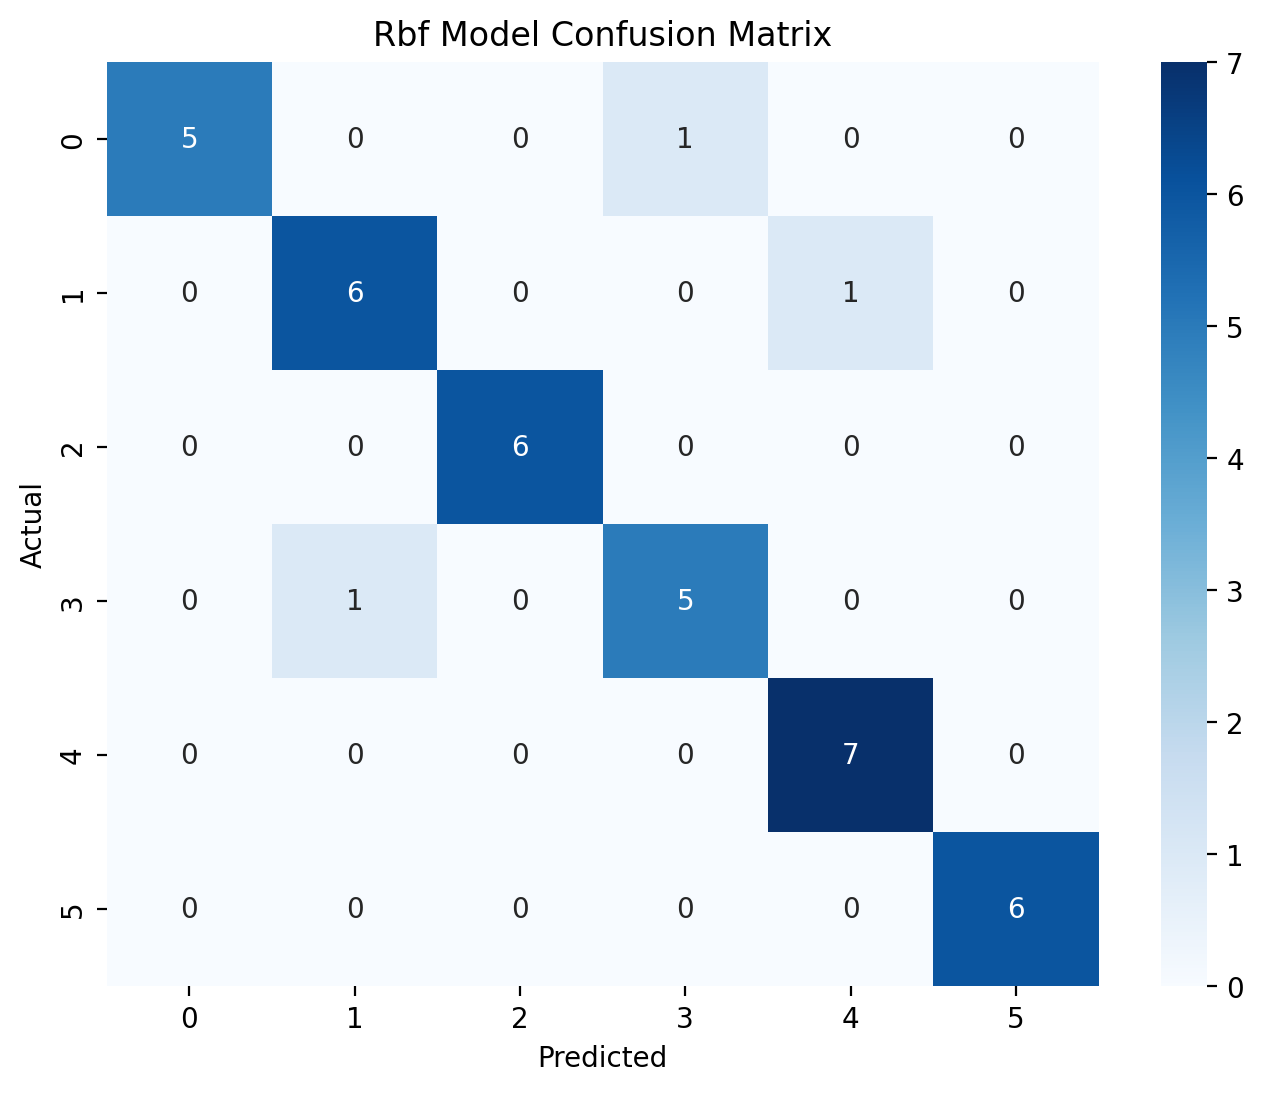

In [ ]:
# Confusion Matrix
rbf_conf_matrix = confusion_matrix(y_test, y_pred)
rbf_conf_df = pd.DataFrame(rbf_conf_matrix,
                       index=[f"True_{label}" for label in rbf_model.classes_],
                       columns=[f"Pred_{label}" for label in rbf_model.classes_])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(rbf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Rbf Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Kernel = Linear, C= 1.0, Gamma= scale**

In [ ]:
# Create SVM model
linear_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=543)

# Perform cross-validation on the training set
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Train the model on the full training set
linear_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = linear_model.predict(X_test)
linear_test_acc = accuracy_score(y_test, y_pred)
linear_test_precision = precision_score(y_test, y_pred, average='weighted')
linear_test_recall = recall_score(y_test, y_pred, average='weighted')
linear_test_f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print results
print("Cross-Validation Scores (Training Set):", cv_scores)
print("Mean CV Accuracy (Training Set):", cv_scores.mean())
print("Test Accuracy:", linear_test_acc)
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))

Cross-Validation Scores (Training Set): [0.63235294 0.75       0.69117647 0.73134328 0.76119403]
Mean CV Accuracy (Training Set): 0.7132133450395083
Test Accuracy: 0.8947368421052632

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      0.86      0.86         7
           2       0.86      1.00      0.92         6
           3       1.00      0.67      0.80         6
           4       0.78      1.00      0.88         7
           5       1.00      0.83      0.91         6

    accuracy                           0.89        38
   macro avg       0.92      0.89      0.89        38
weighted avg       0.91      0.89      0.89        38



In [ ]:
linear_results = pd.DataFrame({
    'Model': [ 'Linear'],
    'Accuracy': [linear_test_precision],
    'Precision': [linear_test_recall],
    'Recall': [linear_test_recall],
    'F1-Score': [linear_test_f1]
})

In [ ]:
linear_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Linear,0.910192,0.894737,0.894737,0.892579


In [ ]:
# Confusion Matrix
linear_conf_matrix = confusion_matrix(y_test, y_pred)
linear_conf_df = pd.DataFrame(linear_conf_matrix,
                       index=[f"True_{label}" for label in linear_model.classes_],
                       columns=[f"Pred_{label}" for label in linear_model.classes_])

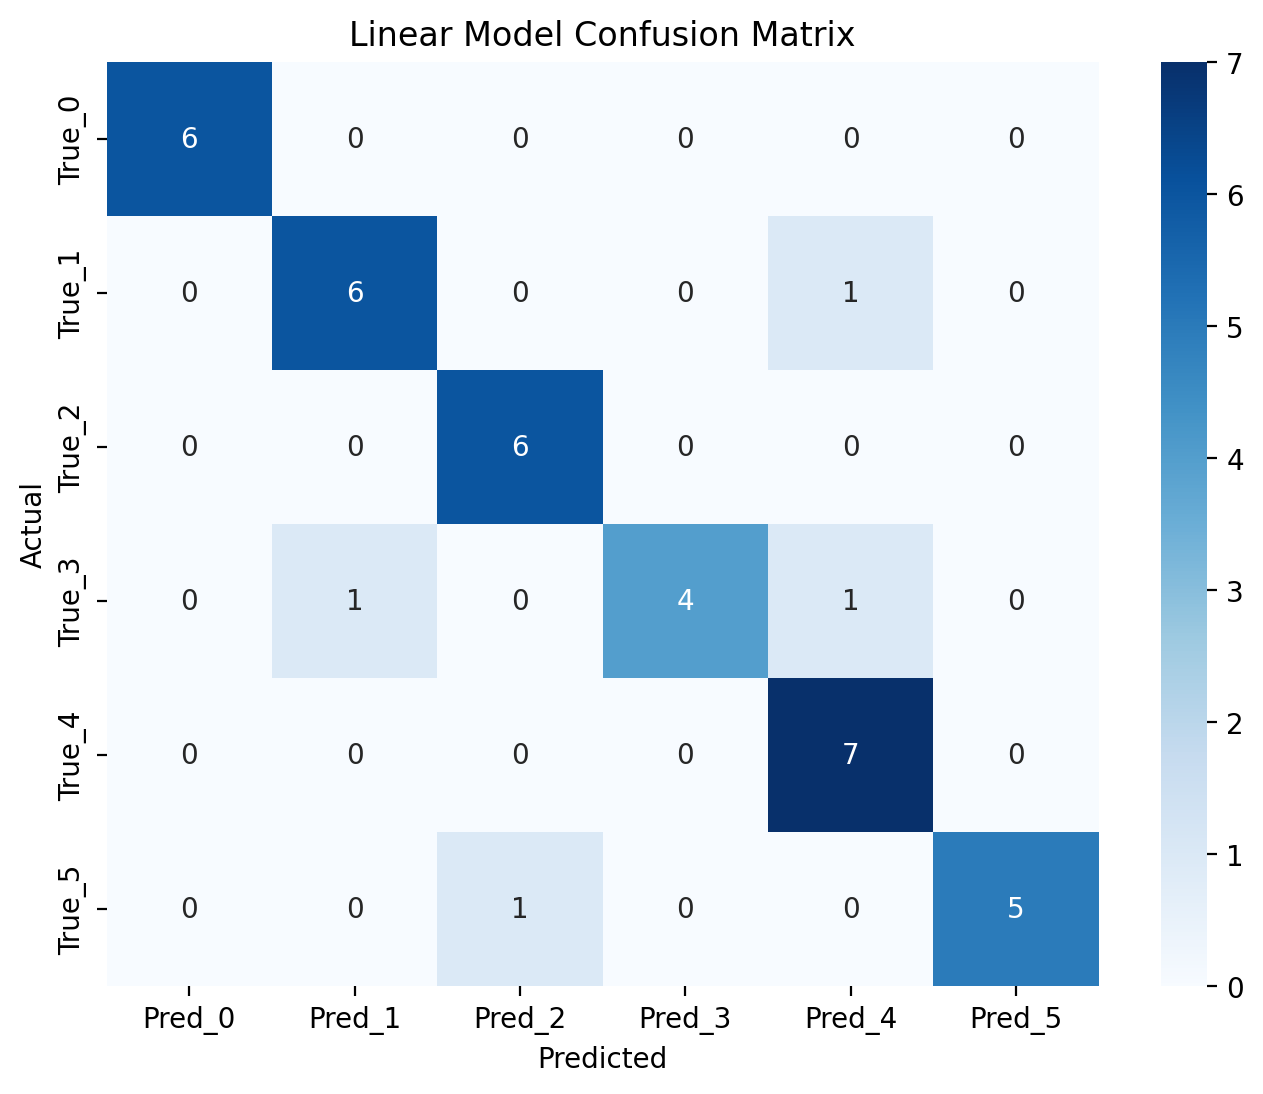

In [ ]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(linear_conf_df, annot=True, fmt="d", cmap="Blues")
plt.title("Linear Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Kernel = Sigmoid, C= 1.0, Gamma= scale**

In [ ]:
# Create SVM model
sig_model = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=543)

# Perform cross-validation on the training set
cv_scores = cross_val_score(sig_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Train the model on the full training set
sig_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = sig_model.predict(X_test)
sig_test_acc = accuracy_score(y_test, y_pred)
sig_test_precision = precision_score(y_test, y_pred, average='weighted')
sig_test_recall = recall_score(y_test, y_pred, average='weighted')
sig_test_f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print results
print("Cross-Validation Scores (Training Set):", cv_scores)
print("Mean CV Accuracy (Training Set):", cv_scores.mean())
print("Test Accuracy:", sig_test_acc)
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))

Cross-Validation Scores (Training Set): [0.57352941 0.60294118 0.55882353 0.53731343 0.6119403 ]
Mean CV Accuracy (Training Set): 0.5769095697980685
Test Accuracy: 0.6842105263157895

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.46      0.86      0.60         7
           2       0.50      0.50      0.50         6
           3       0.50      0.17      0.25         6
           4       1.00      1.00      1.00         7
           5       0.83      0.83      0.83         6

    accuracy                           0.68        38
   macro avg       0.72      0.67      0.66        38
weighted avg       0.72      0.68      0.67        38



In [ ]:
sig_results = pd.DataFrame({
    'Model': [ 'Sigmoid'],
    'Accuracy': [sig_test_acc],
    'Precision': [sig_test_precision],
    'Recall': [sig_test_recall],
    'F1-Score': [sig_test_f1]
})

In [ ]:
sig_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Sigmoid,0.684211,0.716599,0.684211,0.671053


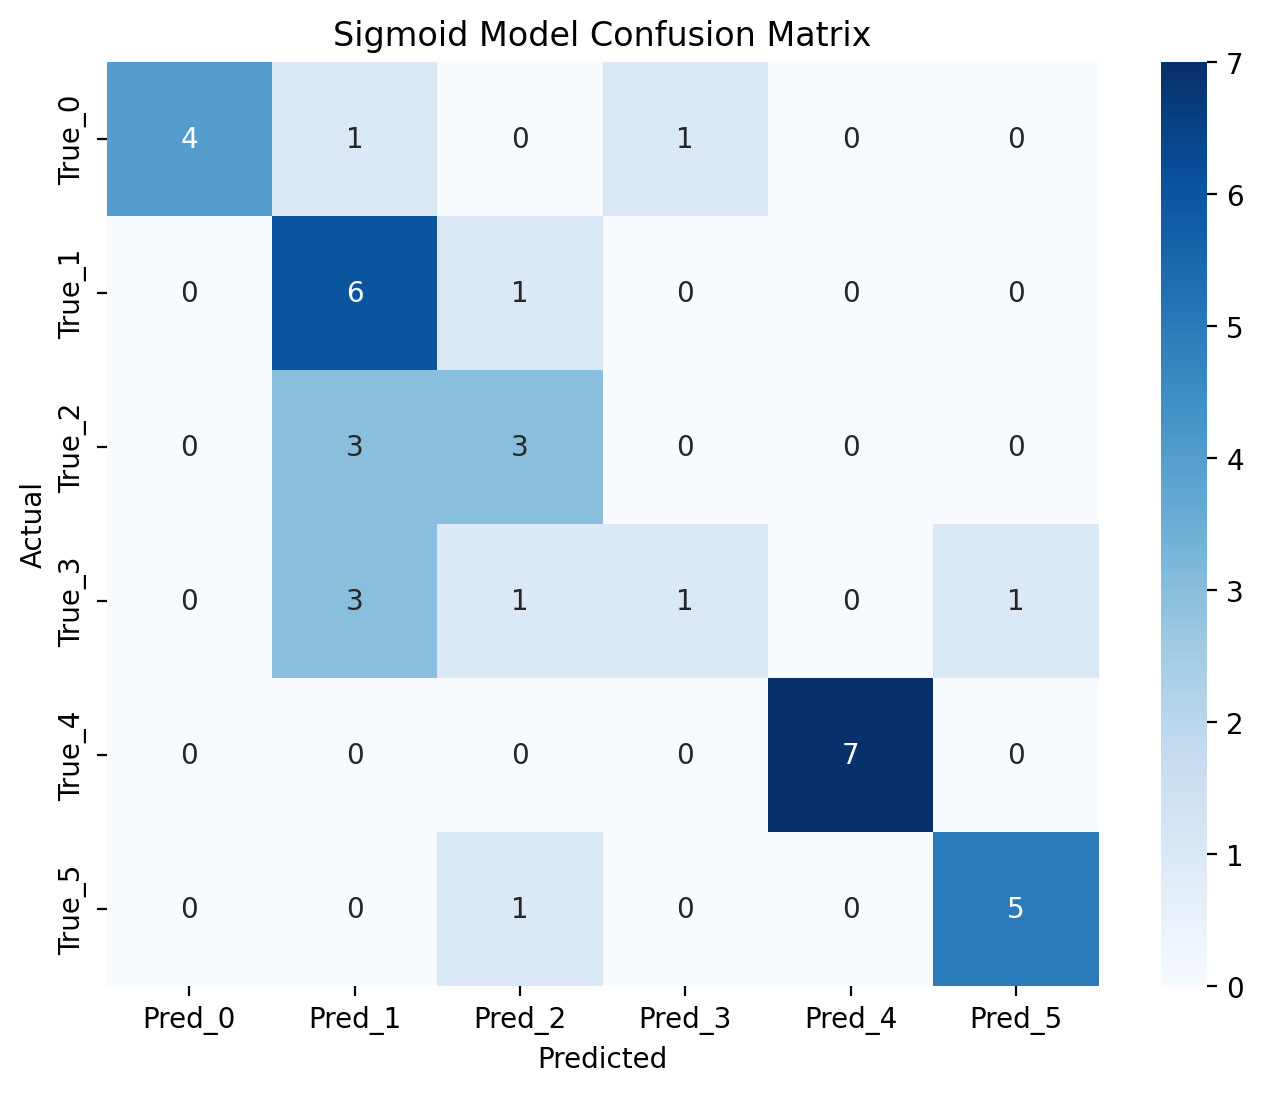

In [ ]:
# Confusion Matrix
sig_conf_matrix = confusion_matrix(y_test, y_pred)
sig_conf_df = pd.DataFrame(sig_conf_matrix,
                       index=[f"True_{label}" for label in sig_model.classes_],
                       columns=[f"Pred_{label}" for label in sig_model.classes_])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(sig_conf_df, annot=True, fmt="d", cmap="Blues")
plt.title("Sigmoid Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Kernel = Poly, C= 1.0, Gamma= scale**

In [ ]:
# Create SVM model
poly_model = SVC(kernel='poly', C=1.0, gamma='scale', random_state=543)

# Perform cross-validation on the training set
cv_scores = cross_val_score(poly_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Train the model on the full training set
poly_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = poly_model.predict(X_test)
poly_test_acc = accuracy_score(y_test, y_pred)
poly_test_precision = precision_score(y_test, y_pred, average='weighted')
poly_test_recall = recall_score(y_test, y_pred, average='weighted')
poly_test_f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print results
print("Cross-Validation Scores (Training Set):", cv_scores)
print("Mean CV Accuracy (Training Set):", cv_scores.mean())
print("Test Accuracy:", poly_test_acc)
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))

Cross-Validation Scores (Training Set): [0.64705882 0.63235294 0.60294118 0.52238806 0.62686567]
Mean CV Accuracy (Training Set): 0.6063213345039509
Test Accuracy: 0.7105263157894737

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.67      0.86      0.75         7
           2       1.00      1.00      1.00         6
           3       1.00      0.33      0.50         6
           4       0.47      1.00      0.64         7
           5       1.00      0.33      0.50         6

    accuracy                           0.71        38
   macro avg       0.86      0.70      0.70        38
weighted avg       0.84      0.71      0.70        38



In [ ]:
poly_results = pd.DataFrame({
    'Model': [ 'Polynomial'],
    'Accuracy': [poly_test_acc],
    'Precision': [poly_test_precision],
    'Recall': [poly_test_recall],
    'F1-Score': [poly_test_f1]
})

In [ ]:
poly_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Polynomial,0.710526,0.840351,0.710526,0.697488


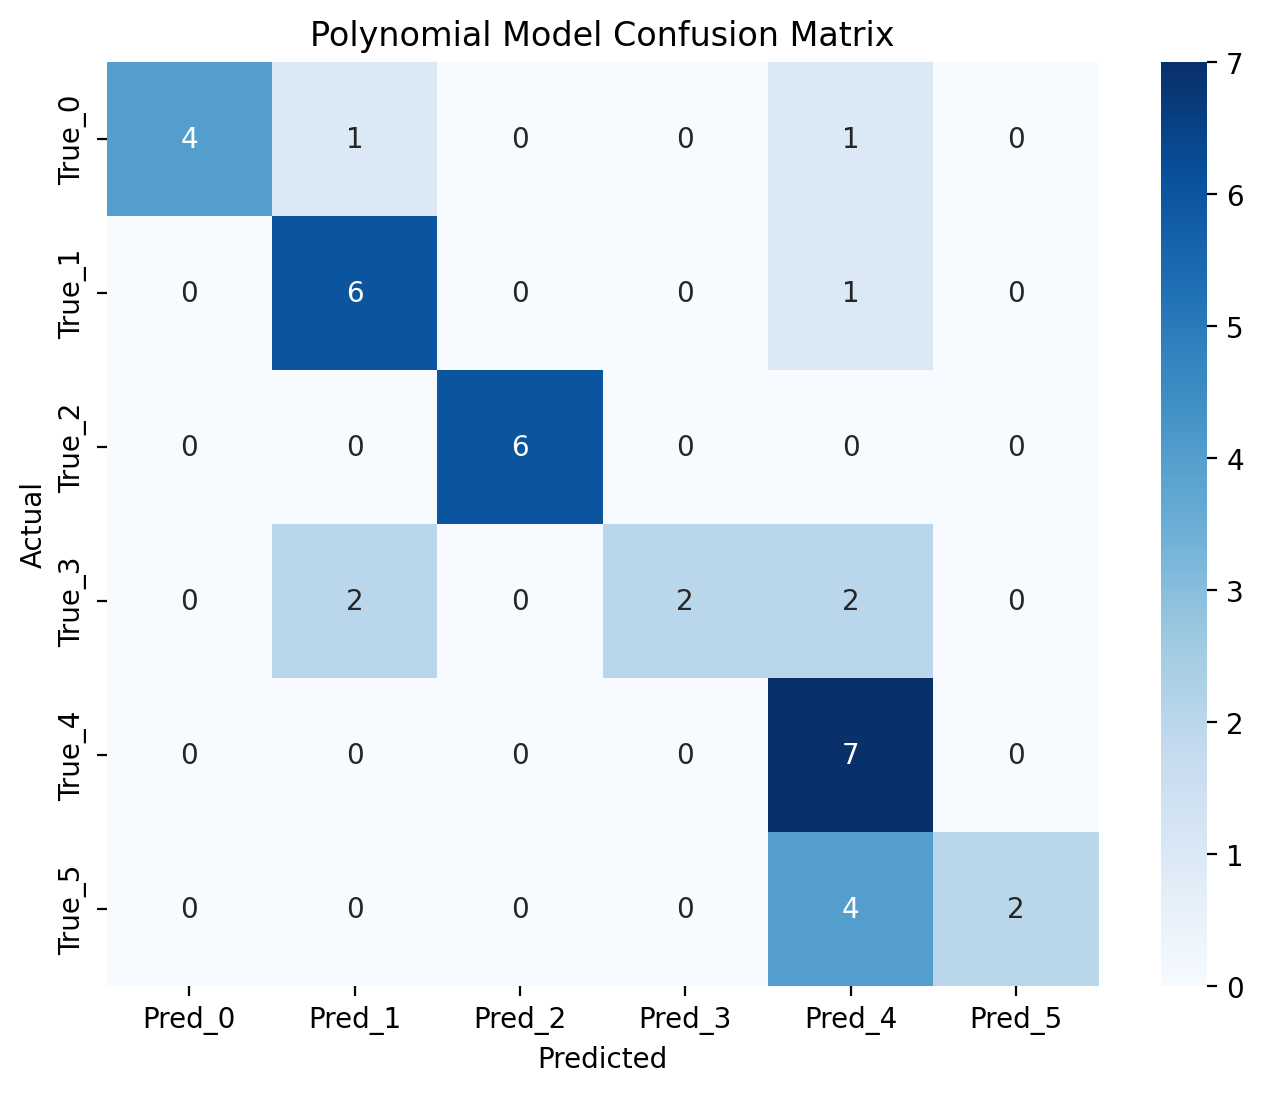

In [ ]:
# Confusion Matrix
poly_conf_matrix = confusion_matrix(y_test, y_pred)
poly_conf_df = pd.DataFrame(poly_conf_matrix,
                       index=[f"True_{label}" for label in poly_model.classes_],
                       columns=[f"Pred_{label}" for label in poly_model.classes_])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(poly_conf_df, annot=True, fmt="d", cmap="Blues")
plt.title("Polynomial Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
# Concat model results df to make it easier to read
model_results = pd.concat([rbf_results, linear_results, sig_results,poly_results], ignore_index=True)

In [ ]:
# Dispay df contents
model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RBF,0.921053,0.924342,0.921053,0.920734
1,Linear,0.910192,0.894737,0.894737,0.892579
2,Sigmoid,0.684211,0.716599,0.684211,0.671053
3,Polynomial,0.710526,0.840351,0.710526,0.697488


# Runtime and Memory Usage

In [ ]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**RBF**

In [ ]:
# Get time complexity
%timeit rbf_model.fit(X_train, y_train)

# Get space complexity
%memit
rbf_model.fit(X_train, y_train)

11.7 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 1972.39 MiB, increment: 0.20 MiB


SVC(random_state=543)

**Linear**

In [ ]:
# Get time complexity
%timeit linear_model.fit(X_train, y_train)

# Get space complexity
%memit
linear_model.fit(X_train, y_train)

8.79 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 1972.86 MiB, increment: 0.00 MiB


SVC(kernel='linear', random_state=543)

**Sigmoid**

In [ ]:
# Get time complexity
%timeit sig_model.fit(X_train, y_train)

# Get space complexity
%memit
sig_model.fit(X_train, y_train)

11.7 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 1973.04 MiB, increment: 0.00 MiB


SVC(kernel='sigmoid', random_state=543)

**Polynomial**

In [ ]:
# Get time complexity
%timeit poly_model.fit(X_train, y_train)

# Get space complexity
%memit
poly_model.fit(X_train, y_train)

17.3 ms ± 4.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 1973.24 MiB, increment: 0.00 MiB


SVC(kernel='poly', random_state=543)